<a href="https://colab.research.google.com/github/GbemisolaAyejuni/CIND820-Big-Data-Analytics-Project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read and Load Dataset
yelp_data = pd.read_csv('/content/combined_reviews_businesses.zip', sep=',', header=0)
yelp_data = yelp_data.rename(columns={"stars_y": "float_stars", "stars_x": "stars"})
yelp_data_filtered = yelp_data[["review_id","text", "stars"]]


In [ ]:
yelp_data_filtered.head()

,review_id,text,stars
0,KU_O5udG6zpxOg-VcAEodg,"If you decide to eat here, just be aware it is...",3
1,saUsX_uimxRlCVr67Z4Jig,Family diner. Had the buffet. Eclectic assortm...,3
2,AqPFMleE6RsU23_auESxiA,"Wow! Yummy, different, delicious. Our favo...",5
3,Sx8TMOWLNuJBWer-0pcmoA,Cute interior and owner (?) gave us tour of up...,4
4,JrIxlS1TzJ-iCu79ul40cQ,I am a long term frequent customer of this est...,1


In [ ]:
#Create sentiment column from star ratings. Ratings 4 and 5 represent positive sentiment, Ratings 1 and 2 represent negative sentiment and Ratings 3 represents neutral sentiment.
yelp_data_filtered.loc[yelp_data_filtered['stars'] == 3, 'sentiment'] = 'neutral'
yelp_data_filtered.loc[yelp_data_filtered['stars'] < 3, 'sentiment'] = 'negative'
yelp_data_filtered.loc[yelp_data_filtered['stars'] > 3, 'sentiment'] = 'positive'

yelp_data_filtered.head()

<ipython-input-4-bf37227ed001>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data_filtered.loc[yelp_data_filtered['stars'] == 3, 'sentiment'] = 'neutral'


,review_id,text,stars,sentiment
0,KU_O5udG6zpxOg-VcAEodg,"If you decide to eat here, just be aware it is...",3,neutral
1,saUsX_uimxRlCVr67Z4Jig,Family diner. Had the buffet. Eclectic assortm...,3,neutral
2,AqPFMleE6RsU23_auESxiA,"Wow! Yummy, different, delicious. Our favo...",5,positive
3,Sx8TMOWLNuJBWer-0pcmoA,Cute interior and owner (?) gave us tour of up...,4,positive
4,JrIxlS1TzJ-iCu79ul40cQ,I am a long term frequent customer of this est...,1,negative


In [5]:
#Language detection. Delete all reviews in non-english language
#install the library
!pip install langdetect

#import detect function from langdetect
from langdetect import detect, LangDetectException

non_en = []  # Store non-English or undetectable reviews
en_reviews = []  # Store English reviews

for index, row in yelp_data_filtered.iterrows():
    try:
        lang = detect(row['text'])
        if lang != 'en':
            non_en.append(row)
        else:
            en_reviews.append(row)
    except LangDetectException:
        non_en.append(row)  # Collect undetectable reviews

# Create DataFrames
non_en_df = pd.DataFrame(non_en)
en_reviews_df = pd.DataFrame(en_reviews)

# Now you have two DataFrames:
# - en_reviews_df: Contains reviews detected as English
# - non_en_df: Contains reviews in other languages or those that couldn't be detected

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=89fe9a649b0469f5fb7fb979bededc61703d18376cebb94915e56a89acb06f13
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [8]:
non_en_df.head()


,review_id,text,stars,sentiment
594,5TWmP6zi4aWQygfOC6b9wg,"De vacaciones y sin ganas de cocinar, decidimo...",5,positive
2360,daLSvHIhA3kJOwBC8Ojp-w,Op suggestie van yelp- hier geweest op onze ee...,5,positive
3005,JI_89Ib6UMPS0Sb3-jyshA,Excelente comida mediterránea! El gyro es buen...,5,positive
4034,oWzz7Vug41O4_Q_VxNbEgg,Peter piper on roids. Good pizza,4,positive
6574,lnCQF7yf3eRZgxTjBoFTAQ,点了四个菜 没一个好吃的 不适合中国人吃\n\n口水鸡鸡肉不新鲜\n毛血旺的大肠好油\n酸豆...,2,negative


In [12]:
len(non_en_df)

5056

In [10]:
len(en_reviews_df)

4719628

In [11]:
#save en_reviews_df as a csv file

en_reviews_df.to_csv('en_reviews.csv', index=False)

In [14]:
print('Total number of reviews: ', len(en_reviews_df))
print('Positive reviews: ', len(en_reviews_df[en_reviews_df['stars'] >= 4]))
print('Neutral reviews: ', len(en_reviews_df[en_reviews_df['stars'] == 3]))
print('Negative reviews: ', len(en_reviews_df[en_reviews_df['stars'] <= 2]))

Total number of reviews:  4719628
Positive reviews:  3206158
Neutral reviews:  542699
Negative reviews:  970771


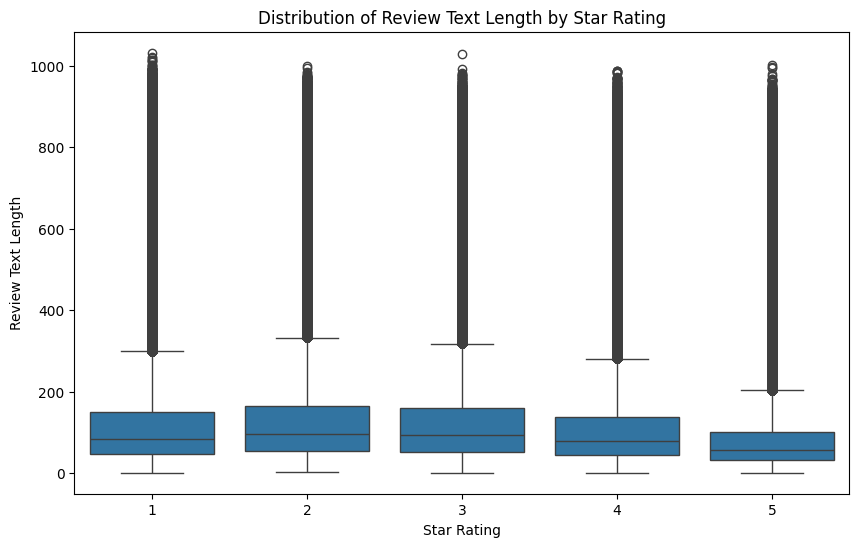

In [24]:
# Calculate the length of each review text
en_reviews_df['text_length'] = en_reviews_df['text'].apply(lambda x: len(x.split()))

# Create a new figure and axes
plt.figure(figsize=(10, 6))

# Use seaborn to create a boxplot of text length by star rating
sns.boxplot(x='stars', y='text_length', data=en_reviews_df)

# Set labels and title
plt.xlabel('Star Rating')
plt.ylabel('Review Text Length')
plt.title('Distribution of Review Text Length by Star Rating')

# Show the plot
plt.show()

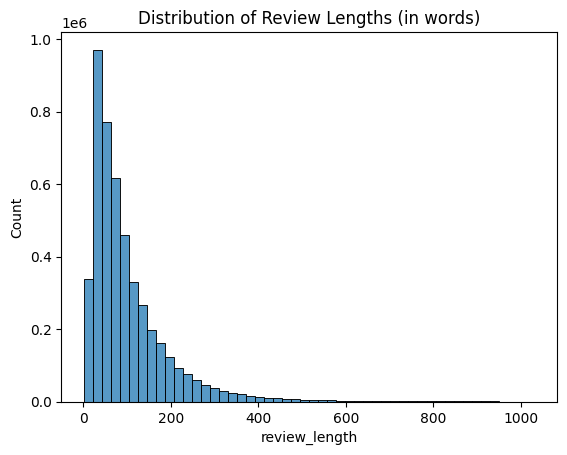

In [23]:
yelp_data['review_length'] = yelp_data['text'].apply(lambda x: len(x.split()))
sns.histplot(yelp_data['review_length'], bins=50)
plt.title('Distribution of Review Lengths (in words)')
plt.show()

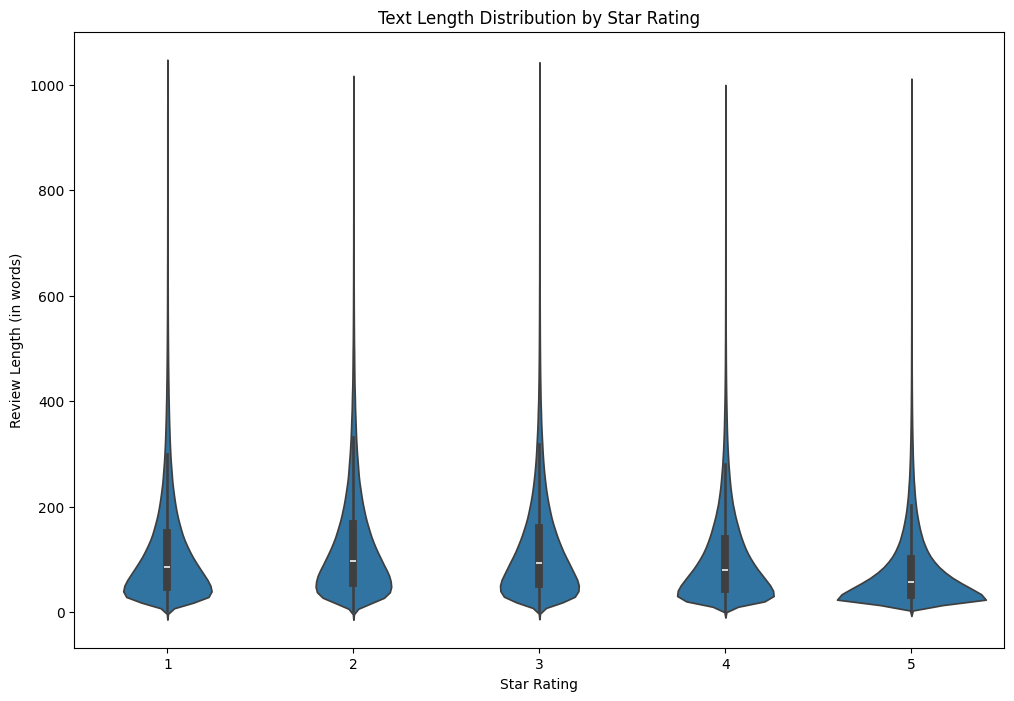

In [25]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='stars', y='text_length', data=en_reviews_df)
plt.title('Text Length Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Length (in words)')
plt.show()


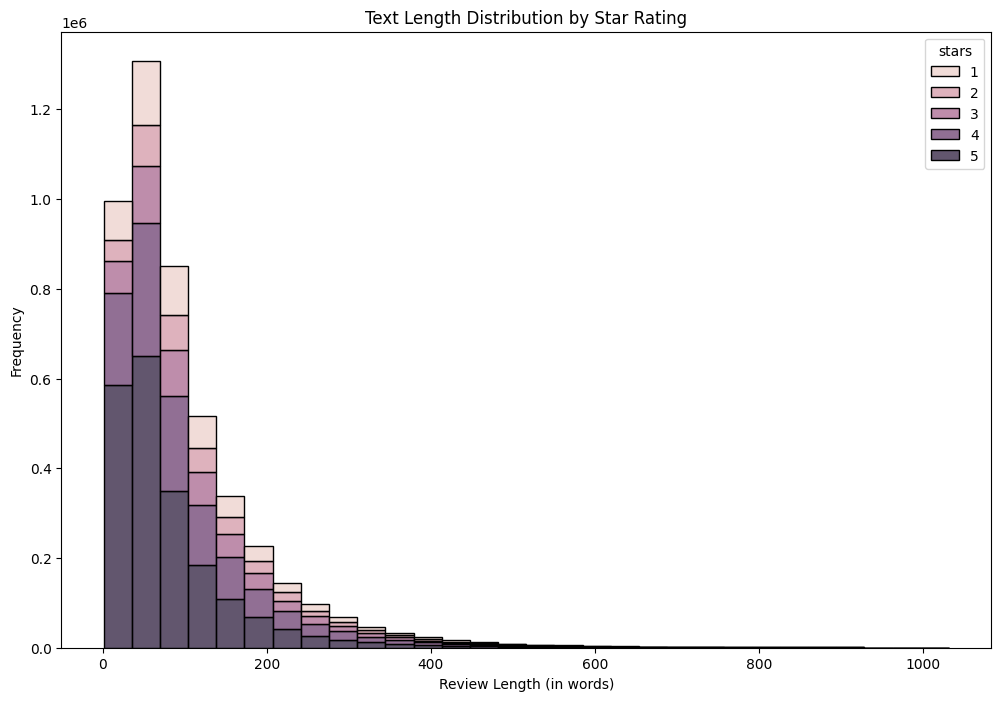

In [26]:
plt.figure(figsize=(12, 8))
sns.histplot(data=en_reviews_df, x='text_length', hue='stars', multiple='stack', bins=30)
plt.title('Text Length Distribution by Star Rating')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()
